## MutationalPatterns

In [13]:
rm(list = ls())

library(MutationalPatterns)

## deconstructSigs

In [24]:
rm(list = ls())

library(deconstructSigs)

sample.mut.ref = read.table('notebook_data//mut.table', header = T)

head(sample.mut.ref)

sample,chrom,pos,ref,alt
1,chr1,2488153,A,G
1,chr1,2494330,G,A
1,chr1,2494785,G,A
1,chr1,23885498,T,C
1,chr1,23885599,T,C
1,chr1,39325063,T,C


In [25]:
sigs.input <- mut.to.sigs.input(mut.ref = sample.mut.ref, 
                                sample.id = "sample", 
                                chr = "chrom", 
                                pos = "pos", 
                                ref = "ref", 
                                alt = "alt")

Warning message in mut.to.sigs.input(mut.ref = sample.mut.ref, sample.id = "sample", :
“Some samples have fewer than 50 mutations:
  1, 2, 3, 4, 5, 6, 7”

In [26]:
test = whichSignatures(tumor.ref = randomly.generated.tumors, 
                       signatures.ref = signatures.nature2013, 
                       sample.id = 2)

In [43]:
sample_1 = whichSignatures(tumor.ref = sigs.input, 
                           signatures.ref = signatures.nature2013, 
                           sample.id = 1, 
                           contexts.needed = TRUE,
                           tri.counts.method = 'default')

plotSignatures(sample_1, sub = paste0("sample_", 1))

pdf 
  2

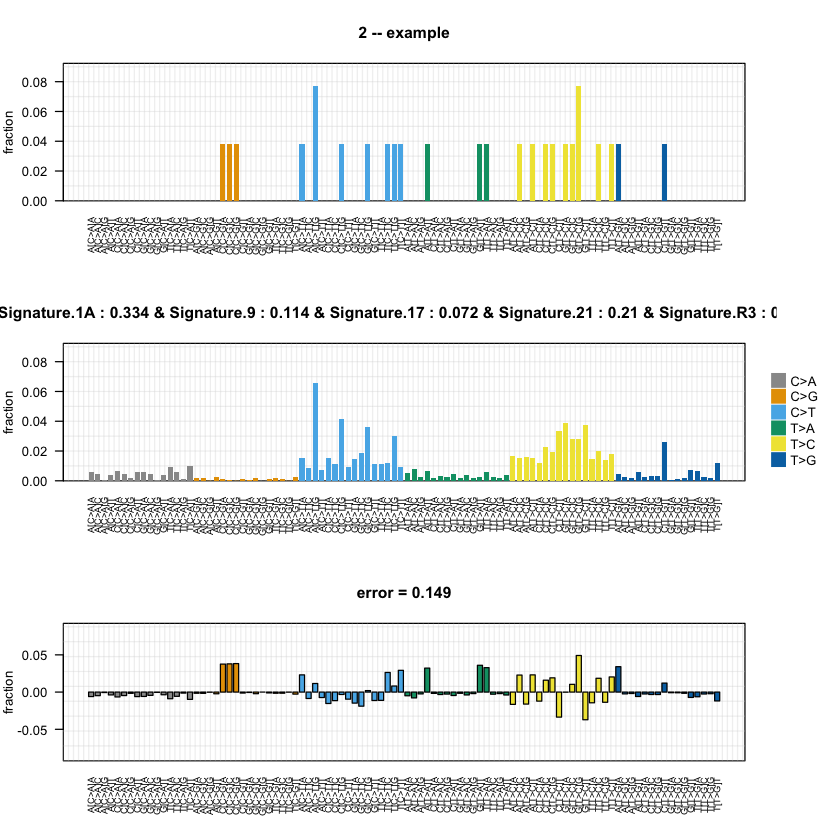

In [17]:
sample_2 = whichSignatures(tumor.ref = sigs.input, 
                           signatures.ref = signatures.nature2013, 
                           sample.id = 2, 
                           contexts.needed = TRUE,
                           tri.counts.method = 'default')

plotSignatures(sample_2, sub = 'example')

In [30]:
plotSignatures

function (sigs.output, sub = "") 
{
    op <- graphics::par()
    tumor <- sigs.output[["tumor"]]
    product <- sigs.output[["product"]]
    diff <- sigs.output[["diff"]]
    weights <- sigs.output[["weights"]]
    y_limit <- 1.2 * max(tumor, product)
    tumor_plotting <- formatContexts(tumor)
    product_plotting <- formatContexts(product)
    error_summed <- round(sqrt(sum(diff * diff)), digits = 3)
    diff_plotting <- formatContexts(diff)
    name <- unique(tumor_plotting$sample.id)
    subtype <- sub
    tmp <- which(weights != 0)
    c <- paste(colnames(weights)[tmp[1]], " : ", round(weights[tmp[1]], 
        3), sep = "")
    if (length(tmp) > 1) {
        for (i in tmp[2:length(tmp)]) {
            c <- paste(c, " & ", colnames(weights)[i], " : ", 
                round(weights[i], 3), sep = "")
        }
    }
    if (subtype == "") {
        top.title <- name
    }
    if (subtype != "") {
        top.title <- paste(name, " -- ", subtype, sep = "")
    }
    graphics::par(mfrow = c(3, 1), xpd = FALSE, mar = c(5, 4, 
        4, 2), oma = c(0, 0, 0, 4))
    grDevices::palette(c("#999999", "#E69F00", "#56B4E9", "#009E73", 
        "#F0E442", "#0072B2"))
    graphics::barplot(tumor_plotting$fraction, names.arg = tumor_plotting$full_context, 
        cex.names = 0.7, las = 2, col = NA, ylim = c(0, y_limit), 
        border = NA, xaxt = "n", ann = FALSE, yaxt = "n", space = 0.3)
    graphics::box()
    x = graphics::par("usr")
    graphics::abline(h = seq(from = 0, to = y_limit, by = 0.01), 
        col = "#d3d3d350", lty = 1)
    graphics::abline(v = seq(from = x[1], to = x[2], by = 1), 
        col = "#d3d3d350", lty = 1)
    graphics::barplot(tumor_plotting$fraction, names.arg = tumor_plotting$full_context, 
        cex.names = 0.7, las = 2, col = factor(tumor_plotting$mutation), 
        ylim = c(0, y_limit), border = NA, space = 0.3, main = top.title, 
        ylab = "fraction", add = TRUE)
    graphics::barplot(product_plotting$fraction, names.arg = product_plotting$full_context, 
        cex.names = 0.7, las = 2, col = NA, ylim = c(0, y_limit), 
        border = NA, xaxt = "n", ann = FALSE, yaxt = "n", space = 0.3)
    graphics::box()
    x = graphics::par("usr")
    graphics::abline(h = seq(from = 0, to = y_limit, by = 0.01), 
        col = "#d3d3d350", lty = 1)
    graphics::abline(v = seq(from = x[1], to = x[2], by = 1), 
        col = "#d3d3d350", lty = 1)
    graphics::barplot(product_plotting$fraction, names.arg = product_plotting$full_context, 
        cex.names = 0.7, las = 2, col = factor(product_plotting$mutation), 
        ylim = c(0, y_limit), border = NA, space = 0.3, main = c, 
        ylab = "fraction", add = TRUE)
    graphics::barplot(diff_plotting$fraction, names.arg = diff_plotting$full_context, 
        cex.names = 0.7, las = 2, col = NA, ylim = c(-y_limit, 
            y_limit), border = NA, xaxt = "n", ann = FALSE, yaxt = "n", 
        space = 0.3)
    graphics::box()
    x = graphics::par("usr")
    graphics::abline(h = seq(from = -y_limit, to = y_limit, by = 0.02), 
        col = "#d3d3d350", lty = 1)
    graphics::abline(v = seq(from = x[1], to = x[2], by = 1), 
        col = "#d3d3d350", lty = 1)
    graphics::barplot(diff_plotting$fraction, names.arg = diff_plotting$full_context, 
        cex.names = 0.7, las = 2, col = factor(diff_plotting$mutation), 
        ylim = c(-y_limit, y_limit), border = "black", space = 0.3, 
        main = paste("error = ", error_summed, sep = ""), ylab = "fraction", 
        add = TRUE)
    graphics::par(fig = c(0, 1, 0, 1), oma = c(1, 1, 1, 1), mar = c(0, 
        0, 0, 0), new = TRUE)
    graphics::plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n")
    graphics::legend("right", legend = unique(tumor_plotting$mutation), 
        col = c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", 
            "#0072B2"), bty = "n", ncol = 1, inset = c(-0, 0), 
        pch = 15, xpd = TRUE, pt.cex = 2.5)
    on.exit(suppressWarnings(graphics::par(op)))
}
<b